In [1]:
#ipdb

In [2]:
import gensim
import numpy as np

In [3]:
#Import job data
import pandas as pd
from pandas import DataFrame
import json

data = []

with open("/Users/ryancramer/Desktop/handshake_feed1.txt") as f:
    for line in f:
        data.append(json.loads(line))
        
df1 = pd.DataFrame(data)

data = []

with open("/Users/ryancramer/Desktop/courses.txt") as f:
    for line in f:
        data.append(json.loads(line))
        
df2 = pd.DataFrame(data)


df_skill = pd.read_csv("/Users/ryancramer/Desktop/Jupyter Notebook Files/SkillsSet5.csv")

skill5 = list()
df_skill = df_skill["0"]
for word in df_skill:
    #print(word)
    skill5.append(word)

#train_texts = df4['description']
jobs_text = df1['description']
courses_text = df2['description']

In [4]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        #sents = raw.split(".")
        #tokens = tokenizer.tokenize(raw)
        #text1 = []
        #for sent in sents:
        tokens = tokenizer.tokenize(raw)
            # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
            # stem tokens
        alpha_tokens = [i for i in stopped_tokens if i.isalpha() and len(i)<14]
            # alpha tokens only
            #stemmed_tokens = [p_stemmer.stem(i) for i in alpha_tokens]
            # add tokens to list
        texts.append((" ").join(alpha_tokens))
        #texts.append(text1)
    return texts

In [5]:
import spacy
nlp = spacy.load("/Users/ryancramer/opt/anaconda3/lib/python3.7/site-packages/en_core_web_lg/en_core_web_lg-2.3.1", disable=['parser', 'ner'])

nlp.add_pipe(nlp.create_pipe('sentencizer'))

In [6]:
%%time

docJ = nlp.pipe(jobs_text)
docC = nlp.pipe(courses_text)

CPU times: user 10 µs, sys: 4 µs, total: 14 µs
Wall time: 17.2 µs


In [7]:
#newwwwwwwww
all_sents_processed = []
for doc in docJ:
    sentences = (list(doc.sents))
    for sent in sentences:
        all_sents_processed.append(sent)
        
for doc in docC:
    sentences = (list(doc.sents))
    for sent in sentences:
        all_sents_processed.append(sent)

In [8]:
jobs_processed = preprocess_data(jobs_text)
courses_processed = preprocess_data(courses_text)
#all_sents_processed = preprocess_data(all_sents)




In [9]:
%%time
corpus = []
for row in all_sents_processed:
        corpus_hold = list()
        for word in row:
            #word = word.lower()
            corpus_hold.append(str(word.lemma_.lower()))
        corpus.append(corpus_hold)
print(len(corpus))

171159
CPU times: user 4.35 s, sys: 542 ms, total: 4.89 s
Wall time: 5.04 s


In [10]:
from gensim.test.utils import get_tmpfile
from gensim.models import Word2Vec



In [11]:
from gensim.models import FastText

In [12]:
%%time
modelF = FastText(corpus, size=100, window=5, min_count=1, workers=4)

modelW = Word2Vec(corpus, size=100, window=5, min_count=0, workers=4)

CPU times: user 4min 58s, sys: 9.03 s, total: 5min 7s
Wall time: 2min 27s


In [13]:
#type(model)

In [14]:
%time


model.train(corpus, total_examples=model.corpus_count, epochs=model.iter)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


NameError: name 'model' is not defined

In [ ]:
#
model.most_similar('human',topn =10)

In [ ]:
model.most_similar('python',topn =10)

In [ ]:
model.save("W2VCorpus.model")

In [ ]:
'''
from gensim.models import Phrases

bigram_transformer = Phrases(common_texts)
model12 = Word2Vec(bigram_transformer[common_texts], min_count=1)
'''

In [ ]:
#model12.most_similar('computer system',topn =3)

In [ ]:
#bigram_transformer.vocab


In [15]:
def ngram(doc_set):
    texts = []
    for i in doc_set:
        text_with_grams = []
        count = 1
        holder = ""
        words = i.split()
        for word in words:
            if count == 1:
                holder = word
            else:  
                text_with_grams.append(holder + " " + word)
                text_with_grams.append(holder)
                if count == len(words):
                    text_with_grams.append(word)
                holder = word
            count = count + 1
        texts.append(text_with_grams)
    return texts

In [16]:
#IF grams
def SkillConverter(jobs,skills):
    texts = []
    
    
    for job in jobs:
        skill_text = []
        for skill in skills:
            if skill in job:
                skill_text.append(skill)
        texts.append(skill_text)
    return texts         


In [17]:
#what is this doing old (BETTER)
def SkillConverter(jobs,skills):
    texts = []
    for job in jobs:
        skill_text = []
        skip_gram = False
        for word in job:
            #if skip_gram == True:
                #skip_gram = False
                #continue
            #elif skip_gram == False and word in skills:
                
                #skill_text.append(word)
                #skip_gram = True
            if word in skills:
                skill_text.append(word)
        texts.append((" ").join(skill_text))
    return texts

In [19]:
#skill5

In [ ]:
"%s".isalpha()

In [20]:
%%time
jobs_ngram = ngram(jobs_processed)
jobs_skills = SkillConverter(jobs_ngram,skill5)
courses_ngram = ngram(courses_processed)
courses_skills = SkillConverter(courses_ngram,skill5)

CPU times: user 9min 21s, sys: 4.84 s, total: 9min 26s
Wall time: 9min 43s


In [ ]:
#jobs_skills = jobs_skills[0:100]

In [ ]:
#print(split_into_sentences(jobss))

In [22]:
%%time
#FastText
job_sumsF = []
for jobss in jobs_skills:
    count = 0
    hold1 = np.empty(100)
    for word in jobss.split():
        #print(word)
        hold1 = hold1 + modelF.wv[word]
        count = count +1
    if count != 0:
        hold1 = hold1 / count
    job_sumsF.append(hold1)

course_sumsF = []
for jobss in courses_skills:
    count = 0
    hold1 = np.empty(100)
    for word in jobss.split():
        #print(word)
        hold1 = hold1 + modelF.wv[word]
        count = count +1
    if count != 0:
        hold1 = hold1 / count
    course_sumsF.append(hold1)

CPU times: user 3.93 s, sys: 464 ms, total: 4.39 s
Wall time: 5.22 s


In [ ]:
#jobs_skills

In [54]:
#twice
doc3 = nlp.pipe(jobs_skills)
doc4 = nlp.pipe(courses_skills)

AttributeError: 'generator' object has no attribute 'text'

In [ ]:
"boot" in modelW.wv.vocab

In [ ]:
job_sumsW

In [48]:
#new
job_sumsW = []
for jobss in doc3:
    count = 0
    hold1 = np.empty(100)
    for word in jobss:
        #print(word.lemma_)
        if word.lemma_ in modelW.wv.vocab:
            hold1 = hold1 + modelW.wv[word.lemma_]
        else:
            print(word.lemma_)
        count = count +1
    if count != 0:
        hold1 = hold1 / count
    job_sumsW.append(hold1)

advertise
advertise
advertise
strut
spre
-PRON-
-PRON-
-PRON-
zenwork
administ
ongoe
ongoe
advertise
launder
acuman
-PRON-
launder
launder
launder
launder
launder
launder
-PRON-
ongoe
strut
strut
-PRON-
-PRON-
advertise
advertise
advertise


In [59]:
0/1


0.0

In [480]:
len(course_sumsF)

8781

In [477]:
len(job_sumsW)

876

In [523]:
print(statistics.mean(maxH))
print(statistics.median(maxH))

6292.150554796843
2506.263911966346


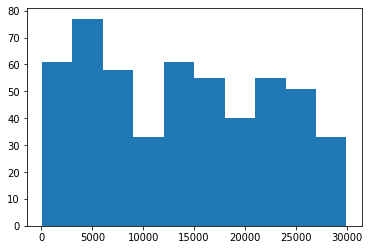

In [529]:
plt.hist(maxH)
plt.show()


In [528]:
#1-norm 
#new
count = 0
maxH = []
for word in job_sumsW:
    norm = 0
    for skill in word:
        norm = norm + abs(skill)
    if norm < 30000:
        maxH.append(norm)
        count = count + 1
print(count)
print(max(maxH))
print(min(maxH))
print(max(maxH)-min(maxH))

524
29985.64888215268
54.8624031781506
29930.78647897453


In [418]:
#1-norm 
maxH = []
for word in job_sumsW:
    norm = 0
    for skill in word:
        norm = norm + abs(skill)
    maxH.append(norm)
print(max(maxH))
print(min(maxH))
print(max(maxH)-min(maxH))


616679.7462683844
54.8624031781506
616624.8838652063


In [55]:
#new
course_sumsW = []
for jobss in doc4:
    count = 0
    hold1 = np.empty(100)
    for word in jobss:
        #print(word.lemma_)
        if word.lemma_ in modelW.wv.vocab:
            hold1 = hold1 + modelW.wv[word.lemma_]
        else:
            print(word.lemma_)
        count = count +1
    if count != 0:
        hold1 = hold1 / count
    course_sumsW.append(hold1)

-PRON-
-PRON-
bioproces
-PRON-
stre
stre
stre
-PRON-
stre
-PRON-
advertise
mips
reengineere
ongoe
-PRON-
-PRON-
-PRON-
sup
multipli
fatty
cholesterol
unstructure
sup
-PRON-
multipli
stre
xen
copywrite
ture
acuman
stre
multipli
-PRON-
materiel
stre
stre
ongoe
-PRON-
advertise
-PRON-
kubernete
-PRON-
-PRON-
-PRON-
ture
-PRON-
stre
-PRON-
ppm
syllabu
-PRON-
ture
-PRON-
spre
advertise
chill
ongoe
stre
ture
ture
launder
launder
launder
launder
biophysics
mapr
administ
advertise
-PRON-
advertise
advertise
advertise
advertise
stre
materiel
deliv
ongoe
ppm
-PRON-
unstructure
computerize
materiel
administ
-PRON-
-PRON-
-PRON-
-PRON-
-PRON-
-PRON-
-PRON-
-PRON-
-PRON-
obstetrics
-PRON-
infiltration
infiltration
-PRON-
multipli
-PRON-
multipli
ture
ture


In [ ]:
course_sumsW

In [ ]:
#old
%%time
#word2vec
job_sumsW = []
for jobss in jobs_skills:
    count = 0
    hold1 = np.empty(100)
    for word in jobss.split():
        print(word)
        hold1 = hold1 + modelW.wv[word]
        count = count +1
    if count != 0:
        hold1 = hold1 / count
    job_sumsW.append(hold1)

course_sumsW = []
for jobss in courses_skills:
    count = 0
    hold1 = np.empty(100)
    for word in jobss.split():
        #print(word)
        hold1 = hold1 + modelW.wv[word]
        count = count +1
    if count != 0:
        hold1 = hold1 / count
    course_sumsW.append(hold1)

In [37]:
#jobs_skills

In [44]:
from sklearn.metrics.pairwise import pairwise_distances

In [38]:
#job_sums

In [33]:
simFCF = 1-pairwise_distances(job_sumsF,course_sumsF, metric='cosine')
simFEF = pairwise_distances(job_sumsF,course_sumsF, metric='euclidean')
#sim = pairwise_distances(job_sums,job_sums, metric='euclidean')

array([[1.63760721e+04, 2.38773091e+04, 4.51925334e+04, ...,
        1.20096869e+02, 1.18567167e+02, 5.21372281e+01],
       [1.63716244e+04, 2.38728613e+04, 4.51880857e+04, ...,
        1.16402045e+02, 1.14731601e+02, 4.82202167e+01],
       [1.63528981e+04, 2.38541349e+04, 4.51693592e+04, ...,
        1.04461454e+02, 1.02043883e+02, 3.68954791e+01],
       ...,
       [5.55333483e+03, 1.94791678e+03, 2.32631312e+04, ...,
        2.18432998e+04, 2.18404291e+04, 2.18890268e+04],
       [1.87438858e+02, 7.68863152e+03, 2.90038549e+04, ...,
        1.61026316e+04, 1.60997539e+04, 1.61483107e+04],
       [6.94946021e+03, 1.44506973e+04, 3.57659215e+04, ...,
        9.34071763e+03, 9.33782120e+03, 9.38626661e+03]])

In [39]:
#course_sumsW

In [56]:
simFCW = 1-pairwise_distances(job_sumsW,course_sumsW, metric='cosine')
simFEW = pairwise_distances(job_sumsW,course_sumsW, metric='euclidean')

In [40]:
df_simFCF = pd.DataFrame(simFCF)
df_simFCF

,0,1,2,3,4,5,6,7,8,9,...,8771,8772,8773,8774,8775,8776,8777,8778,8779,8780
0,0.975810,0.975815,0.975812,0.975799,0.975797,0.975759,0.975751,0.975734,0.975735,0.975734,...,0.960621,0.949147,0.945408,0.730464,0.756858,0.757273,0.823914,0.683381,0.717175,0.780856
1,0.993515,0.993521,0.993521,0.993515,0.993513,0.993485,0.993471,0.993462,0.993463,0.993458,...,0.969974,0.964107,0.967244,0.791111,0.815563,0.815975,0.874278,0.747015,0.779044,0.837620
2,0.996517,0.996520,0.996520,0.996521,0.996522,0.996511,0.996511,0.996506,0.996506,0.996503,...,0.976674,0.968775,0.969013,0.786255,0.811002,0.811415,0.874119,0.744919,0.776292,0.834019
3,0.996511,0.996514,0.996514,0.996516,0.996517,0.996507,0.996508,0.996503,0.996503,0.996501,...,0.977393,0.969375,0.969500,0.786384,0.811097,0.811508,0.874404,0.745046,0.776332,0.834034
4,0.996227,0.996233,0.996232,0.996231,0.996230,0.996211,0.996205,0.996199,0.996200,0.996197,...,0.975826,0.969042,0.970087,0.792445,0.816817,0.817224,0.877719,0.750080,0.781515,0.839066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999,0.999999,0.999999,0.999999,...,0.978039,0.973263,0.974406,0.800000,0.823635,0.824038,0.884928,0.759126,0.788806,0.844208
872,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999,0.999999,0.999999,0.999999,...,0.978036,0.973259,0.974401,0.799986,0.823622,0.824024,0.884921,0.759113,0.788797,0.844199
873,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999,0.999999,0.999999,0.999999,...,0.978037,0.973260,0.974403,0.799991,0.823627,0.824029,0.884925,0.759118,0.788803,0.844204
874,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999,0.999999,0.999999,0.999999,...,0.978044,0.973266,0.974408,0.799985,0.823622,0.824024,0.884922,0.759111,0.788796,0.844199


16376.07213590286

In [393]:
maxxerF = []
minnerF = []
for simt in simFEW:
    maxx = 0
    minn = 0
    for xx in simt:
        if xx < float('inf')  and xx >= maxx:
            maxx = xx
        elif xx <= minn:
            minn = xx
    maxxerF.append(maxx)
    minnerF.append(minn)
    
    
print(max(maxxerF))
print(min(minnerF))

3.799692779737737e+153
0


In [41]:
df_simFEF = pd.DataFrame(simFEF)
df_simFEF

,0,1,2,3,4,5,6,7,8,9,...,8771,8772,8773,8774,8775,8776,8777,8778,8779,8780
0,16376.072136,23877.309073,45192.533409,10074.281269,61999.795078,9407.003095,8596.468879,11737.182803,12922.588163,25094.605255,...,3.023886,12.348562,30.632138,49.315835,137.919326,3345.846587,41.665548,120.096869,118.567167,52.137228
1,16371.624428,23872.861341,45188.085676,10069.833392,61995.347312,9402.555235,8592.021142,11732.735056,12918.140416,25090.157615,...,4.866275,8.552191,26.331916,45.670311,133.913813,3341.740930,37.653870,116.402045,114.731601,48.220217
2,16352.898091,23854.134938,45169.359236,10051.107001,61976.620671,9383.828767,8573.294502,11714.008377,12899.413713,25071.430854,...,22.879084,13.458219,11.402588,36.501682,120.106459,3326.641863,26.209347,104.461454,102.043883,36.895479
3,16183.249031,23684.482559,44999.704115,9881.462540,61806.964151,9214.186961,8403.653962,11544.364119,12729.768242,24901.780456,...,193.017392,182.649828,164.932249,163.072035,120.707482,3190.640443,161.923960,138.070147,132.362515,157.250838
4,16347.384601,23848.621313,45163.845574,10045.593585,61971.107140,9378.315792,8567.781772,11708.495643,12893.900949,25065.918034,...,28.412593,18.659113,9.764875,34.852909,115.980082,3321.935648,24.319769,101.062767,98.387746,34.431654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,10417.258135,17918.495119,39233.719387,4115.468747,56040.981508,3448.194741,2637.668269,5778.380322,6963.784957,19135.798306,...,5958.269469,5947.761864,5929.719318,5923.913355,5849.583368,3726.149951,5924.906949,5873.134037,5870.211121,5918.500272
872,4481.486437,11982.722689,33297.946694,1820.314527,50105.209248,2487.604264,3298.142347,158.350761,1028.162438,13200.040914,...,11894.042291,11883.533900,11865.489069,11859.638873,11785.064881,9336.551128,11860.657627,11808.616610,11805.729428,11854.230363
873,5553.334833,1947.916785,23263.131183,11855.125323,40070.394706,12522.408932,13332.946544,10192.249353,9006.851186,3165.385498,...,21928.858843,21918.350069,21900.304070,21894.433131,21819.747798,19269.872593,21895.463664,21843.299848,21840.429083,21889.026835
874,187.438858,7688.631521,29003.854946,6114.401030,45811.117795,6781.686252,7592.224434,4451.542104,3266.160445,8905.972614,...,16188.133982,16177.625317,16159.579697,16153.717896,16079.079511,13568.953967,16154.743385,16102.631554,16099.753949,16148.310679


In [57]:
df_simFCW = pd.DataFrame(simFCW)
df_simFCW

,0,1,2,3,4,5,6,7,8,9,...,8771,8772,8773,8774,8775,8776,8777,8778,8779,8780
0,0.875555,0.917209,0.920380,0.898639,0.891890,0.845145,0.839304,0.837189,0.855519,0.865233,...,0.887505,0.871609,0.866951,0.648805,0.682010,0.682459,0.752374,0.609586,0.647562,0.718489
1,0.906836,0.958641,0.964180,0.946599,0.937960,0.903088,0.893220,0.892781,0.909218,0.916893,...,0.914126,0.907124,0.913458,0.733939,0.765703,0.766128,0.828137,0.696135,0.732812,0.796522
2,0.890318,0.947668,0.955978,0.951709,0.945981,0.924629,0.916891,0.915547,0.929854,0.937482,...,0.933985,0.920708,0.918493,0.729721,0.762713,0.763168,0.835291,0.699475,0.734789,0.793976
3,0.889928,0.947064,0.955760,0.951842,0.946323,0.925047,0.917396,0.916094,0.930237,0.937945,...,0.935420,0.921934,0.919983,0.730511,0.763454,0.763895,0.836084,0.700074,0.735254,0.794650
4,0.898438,0.955463,0.963163,0.954597,0.948171,0.922755,0.913985,0.913143,0.928031,0.935762,...,0.932307,0.922570,0.923081,0.734590,0.767320,0.767733,0.837444,0.702042,0.737935,0.798391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,0.886474,0.943406,0.954766,0.953086,0.947823,0.939659,0.932798,0.933134,0.946321,0.954407,...,0.941186,0.936847,0.935870,0.742465,0.774187,0.774553,0.847799,0.710198,0.743236,0.797499
872,0.886518,0.943438,0.954791,0.953110,0.947844,0.939655,0.932801,0.933131,0.946322,0.954406,...,0.941182,0.936842,0.935863,0.742441,0.774164,0.774530,0.847783,0.710175,0.743219,0.797483
873,0.886545,0.943458,0.954808,0.953127,0.947858,0.939658,0.932809,0.933138,0.946329,0.954412,...,0.941181,0.936849,0.935875,0.742436,0.774159,0.774525,0.847781,0.710166,0.743212,0.797478
874,0.886522,0.943443,0.954799,0.953125,0.947859,0.939664,0.932811,0.933141,0.946330,0.954414,...,0.941189,0.936858,0.935881,0.742426,0.774151,0.774516,0.847776,0.710155,0.743199,0.797469


In [58]:
df_simFEW = pd.DataFrame(simFEW)
df_simFEW

,0,1,2,3,4,5,6,7,8,9,...,8771,8772,8773,8774,8775,8776,8777,8778,8779,8780
0,3.437357,9.100419,28.047781,6.593158,75.097648,15.681663,19.902068,37.306070,47.835505,105.631934,...,3.277194,8.021488,18.739225,27.649531,78.872623,1920.524695,24.764512,70.144989,69.361140,30.588038
1,4.153456,7.084908,25.956492,4.726561,73.064465,13.709780,17.972307,35.316864,45.812591,103.601632,...,4.083189,6.517242,16.809627,25.897093,76.930690,1918.540832,22.830682,68.340343,67.486812,28.697033
2,14.722944,7.480499,16.358694,9.259048,62.716970,8.096281,10.694976,25.962170,35.876940,93.164699,...,14.398031,9.328783,10.027494,21.911240,69.461963,1910.092310,16.976227,61.895393,60.552650,22.881392
3,116.797217,108.141102,90.040762,110.850715,52.464336,103.081537,99.531607,84.732816,75.015480,42.557668,...,116.556199,110.146972,100.262014,101.559185,79.669756,1833.573017,98.942141,88.146463,84.535698,96.754243
4,19.102837,11.043794,12.638096,13.446055,58.578606,9.589850,10.423493,22.910821,32.283378,89.136470,...,18.882906,13.260452,9.640233,21.566494,66.576512,1906.556881,16.216141,59.619241,58.031418,21.553299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,3626.935545,3618.241380,3599.668424,3620.925309,3555.519101,3612.613954,3608.783318,3592.406090,3581.701479,3526.076952,...,3626.650603,3619.978066,3609.569685,3609.055203,3568.257889,2463.335780,3607.432033,3580.197318,3578.073529,3604.465326
872,7238.571240,7229.875701,7211.296815,7232.560647,7167.106285,7224.246959,7220.413957,7204.026057,7193.316830,7137.633805,...,7238.286885,7231.613166,7221.201218,7220.661229,7179.699238,5880.425811,7219.051916,7191.643944,7189.540459,7216.070965
873,13344.913994,13336.217801,13317.636071,13338.903203,13273.426706,13330.588411,13326.754261,13310.361319,13299.649979,13243.940416,...,13344.629943,13337.955581,13327.541746,13326.990258,13285.953315,11921.653088,13325.387296,13297.900555,13295.806385,13322.399947
874,9851.837123,9843.141237,9824.560661,9845.826279,9780.358587,9837.511867,9833.678221,9817.287280,9806.576856,9750.878081,...,9851.552823,9844.878623,9834.465466,9833.919462,9792.914461,8454.404481,9832.313624,9804.860862,9802.762843,9829.329188


In [ ]:
print(job_sums[872])
print()
print(course_sums[0])


In [ ]:
courses_skills[0]

In [ ]:
df_simFCW

In [ ]:
hold = [df_simFCW[7620][61],df_simFCW[1502][101],df_simFCW[1500][100],df_simFCW[150][100],df_simFCW[6811][17],df_simFCW[393][10],df_simFCW[50][100],df_simFCW[6211][17],df_simFCW[1432][11]]

In [ ]:
print(hold)

In [ ]:
df_simFCW[50][100]

In [ ]:
df_simFCW[7983][12]

In [ ]:
column[61][7620]

In [ ]:
jobs_text[7620]

In [ ]:
sim_flat = simFCW.flatten()

In [ ]:
df_FCW = pd.DataFrame(sim_flat)

In [ ]:
df_FCW.hist()

In [ ]:
sim_flatE = simFEW.flatten()

In [ ]:
df_FEW = pd.DataFrame(sim_flatE)

In [ ]:
df_FEW[1:].hist(max=100000)

In [ ]:
jobs_text[61]

In [ ]:
#job 5 less similar
jobs_text[14]

In [ ]:
#course 5
courses_text[10]

In [ ]:
df_simFCW[11][5]

In [ ]:
#job 6 not similar
jobs_text[5]

In [ ]:
#course 6
courses_text[11]

In [ ]:
df_simFCW[7983][12]

In [ ]:
df_simFCW[6221][15]

In [ ]:
column[61][7620],column[101][1502],column[100][1500],column[100][150],column[17][6811]

In [ ]:
len(jobs_text)

In [ ]:
#7
print(jobs_text[61])
print(courses_text[7620])

In [ ]:
#8
print(jobs_text[101])
print(courses_text[296])

In [ ]:
print(jobs_text[100])
print("   ksakskaksm.   ")
print(courses_text[296])

In [ ]:
df_simFCW[1668][14]

In [ ]:
count =0

for course in courses_text:
    
    if "Cloud services make it easy for developers " in course:
        print(count)
        break
    count = count +1
    

In [ ]:
courses_text[122]

In [ ]:
print(jobs_text[7])

In [ ]:
df_simFCW[122][7]

In [284]:
#Fast text
average = 0

for word in test_df3.values:
    #print(word)
    one = df_simFCF[word[1]][word[0]]
    two = df_simFCF[word[2]][word[0]]
    
    
    
    #avg_sim = (one+two)/2
    
    #mean = df_simFCF.mean(axis=1)[word[0]]
    #could use median
    
    if word[3] == 1 and one > two:
        average = average + 1 
    elif word[3] == 2 and two > one:
        average = average + 1
    #elif word[3] == 0 and avg_sim < mean:
        #average = average + 1
    #elif word[3] == 3 and avg_sim > mean:
        #average = average + 1
        
average = average/numTest
print(average)

0.5615384615384615


In [449]:
#new
import pandas as pd
test_df1 = pd.read_csv("/Users/ryancramer/Desktop/Jupyter Notebook Files/testwrite2")
test_df2 = pd.read_csv("/Users/ryancramer/Desktop/Jupyter Notebook Files/testwrite11")
test_df4 = pd.read_csv("/Users/ryancramer/Desktop/Jupyter Notebook Files/testwrite12")
test_df3 = pd.concat([test_df1,test_df2,test_df4])
test_df3

,Job,Course 1,Course 2,Similarity
0,574,3626,2636,0
1,108,2103,5883,0
2,459,3634,8246,1
3,9,3208,1171,2
4,261,8596,3112,2
...,...,...,...,...
64,690,2380,4849,0
65,115,3296,867,2
66,186,2606,4735,2
67,846,769,7044,2


,Job,Course 1,Course 2,Similarity
0,574,3626,2636,0
1,108,2103,5883,0
2,459,3634,8246,1
3,9,3208,1171,2
4,261,8596,3112,2
...,...,...,...,...
149,415,4282,6758,1
150,440,790,5958,2
151,285,6577,56,0
152,311,44,3338,2


In [81]:
#old
import pandas as pd
test_df1 = pd.read_csv("/Users/ryancramer/Desktop/Jupyter Notebook Files/testwrite2")
test_df2 = pd.read_csv("/Users/ryancramer/Desktop/Jupyter Notebook Files/testwrite6")
test_df3 = pd.concat([test_df1,test_df2])
test_df3


,Job,Course 1,Course 2,Similarity
0,574,3626,2636,0
1,108,2103,5883,0
2,459,3634,8246,1
3,9,3208,1171,2
4,261,8596,3112,2
...,...,...,...,...
92,100,1734,4298,2
93,683,3656,1029,2
94,241,8473,5994,1
95,304,207,5290,0


In [162]:
print(test_df3[20:30])

    Job  Course 1  Course 2  Similarity
20  602      1781      2238           2
21  709      6909      5794           2
22  819      1107       671           1
23  683      3602      7557           0
24  443      8126      5088           1
25  409      4539      2115           2
26  558       834      2765           0
27  789      5044      7460           0
28   52      6340      4956           1
29  149      1218      4761           3


In [450]:
numTest = 0
for word in test_df3.values:
    if word[3] == 1 or word[3] == 2:
        numTest = numTest + 1
        
print(numTest)

400


In [281]:
df_simFCW[1][0]

0.9172094111188741

In [279]:
df_simFCW

,0,1,2,3,4,5,6,7,8,9,...,8771,8772,8773,8774,8775,8776,8777,8778,8779,8780
0,0.875555,0.917209,0.920380,0.898639,0.891890,0.845145,0.839304,0.837189,0.855519,0.865233,...,0.887505,0.871609,0.866951,0.648805,0.682010,0.682459,0.752374,0.609586,0.647562,0.718489
1,0.906836,0.958641,0.964180,0.946599,0.937960,0.903088,0.893220,0.892781,0.909218,0.916893,...,0.914126,0.907124,0.913458,0.733939,0.765703,0.766128,0.828137,0.696135,0.732812,0.796522
2,0.890318,0.947668,0.955978,0.951709,0.945981,0.924629,0.916891,0.915547,0.929854,0.937482,...,0.933985,0.920708,0.918493,0.729721,0.762713,0.763168,0.835291,0.699475,0.734789,0.793976
3,0.889928,0.947064,0.955760,0.951842,0.946323,0.925047,0.917396,0.916094,0.930237,0.937945,...,0.935420,0.921934,0.919983,0.730511,0.763454,0.763895,0.836084,0.700074,0.735254,0.794650
4,0.898438,0.955463,0.963163,0.954597,0.948171,0.922755,0.913985,0.913143,0.928031,0.935762,...,0.932307,0.922570,0.923081,0.734590,0.767320,0.767733,0.837444,0.702042,0.737935,0.798391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,0.886474,0.943406,0.954766,0.953086,0.947823,0.939659,0.932798,0.933134,0.946321,0.954407,...,0.941186,0.936847,0.935870,0.742465,0.774187,0.774553,0.847799,0.710198,0.743236,0.797499
872,0.886518,0.943438,0.954791,0.953110,0.947844,0.939655,0.932801,0.933131,0.946322,0.954406,...,0.941182,0.936842,0.935863,0.742441,0.774164,0.774530,0.847783,0.710175,0.743219,0.797483
873,0.886545,0.943458,0.954808,0.953127,0.947858,0.939658,0.932809,0.933138,0.946329,0.954412,...,0.941181,0.936849,0.935875,0.742436,0.774159,0.774525,0.847781,0.710166,0.743212,0.797478
874,0.886522,0.943443,0.954799,0.953125,0.947859,0.939664,0.932811,0.933141,0.946330,0.954414,...,0.941189,0.936858,0.935881,0.742426,0.774151,0.774516,0.847776,0.710155,0.743199,0.797469


In [347]:
#Word 2 Vec
average = 0

for word in test_df3.values:
    #print(word)
    one = df_simFCW[word[1]][word[0]]
    two = df_simFCW[word[2]][word[0]]
    #avg_sim = (one+two)/2
    #mean = df_simFCW.mean(axis=1)[word[0]]
    if word[3] == 1 and one > two:
        average = average + 1 
    elif word[3] == 2 and two > one:
        average = average + 1
    '''
    elif word[3] == 0 and avg_sim < mean:
        average = average + 1
    elif word[3] == 3 and avg_sim > mean:
        average = average + 1
    '''
        
average = average/numTest
print(average)

0.5333333333333333


In [ ]:
#herehereherehereherehereherehereherehereherehereherehereherehereherehere

In [189]:
len(jobs_skills)

876

In [193]:
new = [1]

In [194]:
len(new)

1

In [190]:
checker = [1,2,3,4]

In [192]:
check

[2, 3, 4]

In [191]:
check = checker[1:]

In [195]:
jobs_skills2 = jobs_skills[146:]

In [196]:
doc3 = nlp.pipe(jobs_skills2)
doc4 = nlp.pipe(courses_skills)

In [188]:
doc4

<generator object Language.pipe at 0x1b2643a450>

In [197]:
%%time
column = []
for docj in doc3:
    row = []
    doc4 = nlp.pipe(courses_skills[1:])
    for docc in doc4:
        row.append(docc.similarity(docj))
        
    column.append(row)

/Users/ryancramer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  


CPU times: user 3h 38min 18s, sys: 32min 45s, total: 4h 11min 3s
Wall time: 4h 20min 13s


In [198]:
len(column)

730

In [174]:
type(column)

list

In [76]:
col = pd.DataFrame(column)
col

,0,1,2,3,4,5,6,7,8,9,...,8770,8771,8772,8773,8774,8775,8776,8777,8778,8779
0,0.866765,0.820076,0.831417,0.735399,0.746892,0.826259,0.824602,0.863643,0.881462,0.827351,...,0.815167,0.851790,0.761471,0.180216,0.820568,0.348516,0.808758,0.178895,0.880250,0.802418
1,0.891944,0.840918,0.833264,0.726092,0.809313,0.803603,0.846248,0.878570,0.881742,0.860609,...,0.786309,0.904033,0.843263,0.216125,0.842062,0.331369,0.804828,0.214330,0.908770,0.855686
2,0.866756,0.843843,0.871807,0.780722,0.818170,0.883924,0.864499,0.868410,0.915478,0.815102,...,0.867475,0.856220,0.757057,0.225937,0.823581,0.312833,0.880187,0.231751,0.861052,0.758024
3,0.800267,0.844040,0.849693,0.739201,0.749170,0.872241,0.818690,0.818136,0.827945,0.781618,...,0.824751,0.857020,0.800465,0.193315,0.783639,0.306849,0.832592,0.193253,0.844189,0.784805
4,0.905055,0.849839,0.824750,0.726188,0.806523,0.821110,0.855340,0.893772,0.896083,0.852852,...,0.811606,0.902216,0.828375,0.199692,0.854019,0.320477,0.818777,0.197118,0.908849,0.844831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0.797716,0.775717,0.784030,0.668202,0.763484,0.798646,0.827071,0.799811,0.841770,0.775758,...,0.760060,0.801295,0.722143,0.200521,0.765429,0.239335,0.781289,0.201220,0.801749,0.710489
142,0.866725,0.861862,0.865929,0.749954,0.810591,0.880306,0.868498,0.867556,0.891488,0.816581,...,0.850651,0.873261,0.783578,0.229289,0.823694,0.298678,0.865527,0.232989,0.874106,0.761813
143,0.834357,0.846029,0.819134,0.700855,0.830870,0.830691,0.860719,0.851995,0.911858,0.823322,...,0.798510,0.907153,0.829408,0.197465,0.832389,0.281251,0.823118,0.199122,0.852198,0.801422
144,0.886845,0.875911,0.811522,0.761066,0.785881,0.788757,0.840143,0.863381,0.887054,0.855290,...,0.837193,0.878671,0.779002,0.178111,0.864191,0.413775,0.815071,0.177148,0.846355,0.812047


In [264]:
columnFinal = test_dfCol3.values.tolist()

In [348]:
average = 0
#count = 0
for word in test_df3.values:
    #print(word)
    #swithced
    #if word[0]<len(col):
    #count = count + 1
    one = columnFinal[word[0]][word[1]]
    two = columnFinal[word[0]][word[2]]
        #avg_sim = (one+two)/2
        #mean = col.mean(axis=1)[word[0]]
    
    if word[3] == 1 and one > two:
        average = average + 1 

    elif word[3] == 2 and two > one:
        average = average + 1

    '''
    elif word[3] == 0 and avg_sim < mean:
        average = average + 1
    elif word[3] == 3 and avg_sim > mean:
        average = average + 1
    '''
            
        
average = average/numTest
#print("Count: ")
#print(count)
print("Average: ")
print(average)

Average: 
0.4823529411764706


In [273]:
65/130

0.5

In [255]:
#NOOOOOO
average = 0
count = 0
for word in test_df3.values:
    count = count +1
    #print(word)
    one = df_simFCW[word[1]][word[0]]
    two = df_simFCW[word[2]][word[0]]
    avg_sim = (one+two)/2
    mean = df_simFCW.mean(axis=1)[word[0]]
    if word[3] == 1 and one > two:
        average = average + 1 
    elif word[3] == 2 and two > one:
        average = average + 1
    '''
    elif word[3] == 0 and avg_sim < mean:
        average = average + 1
    elif word[3] == 3 and avg_sim > mean:
        average = average + 1
    '''
        
average = average/numTest
print(average)
#print(count)

0.5307692307692308
184


In [84]:
test_df3[0:8]

,Job,Course 1,Course 2,Similarity
0,574,3626,2636,0
1,108,2103,5883,0
2,459,3634,8246,1
3,9,3208,1171,2
4,261,8596,3112,2
5,255,2002,8606,1
6,70,4509,6827,0
7,296,8021,5888,2


In [91]:
#no
average = 0
count = 0
for word in test_df3.values:
    #print(word)
    #swithced
    if word[0]<len(col):
        count = count + 1
        one = col[word[1]][word[0]]
        two = col[word[2]][word[0]]
        avg_sim = (one+two)/2
        mean = col.mean(axis=1)[word[0]]
        if word[3] == 1 and one > two:
            average = average + 1 
        elif word[3] == 2 and two > one:
            average = average + 1
        elif word[3] == 0 and avg_sim < mean:
            average = average + 1
        elif word[3] == 3 and avg_sim > mean:
            average = average + 1
            
        
average = average/count
print("Count: ")
print(count)
print("Average: ")
print(average)

Count: 
24
Average: 
0.6666666666666666


In [124]:
len(simFCW2[0])

8781

In [151]:
simFCW3 = []
for word in simFCW2:
    words = word[1:]
    simFCW3.append(words)

In [127]:
len(simFCW3[0])

8780

In [121]:
len(column[1])

8780

In [147]:
len(column)

146

In [149]:
len(simFCW2)

147

In [ ]:
len

In [150]:
#fix range
simFCW2 = simFCW[0:146]

In [152]:
x = [item for sub in simFCW3 for item in sub]

In [112]:
x = simFCW2.flatten()

In [ ]:
#similarity_pd = col.transpose()

In [96]:
#transpose the array
#similarity_pd = column

In [135]:
y = [item for sub in column for item in sub]

In [97]:
y = similarity_pd.flatten()

AttributeError: 'list' object has no attribute 'flatten'

In [153]:
len(x)

1281880

In [146]:
len(y)

1281880

In [154]:
corr = pd.DataFrame({'W2V': x, 'Similarity': y})
corr

,W2V,Similarity
0,0.917209,0.866765
1,0.920380,0.820076
2,0.898639,0.831417
3,0.891890,0.735399
4,0.845145,0.746892
...,...,...
1281875,0.779066,0.345402
1281876,0.851435,0.836400
1281877,0.715525,0.208228
1281878,0.749023,0.835373


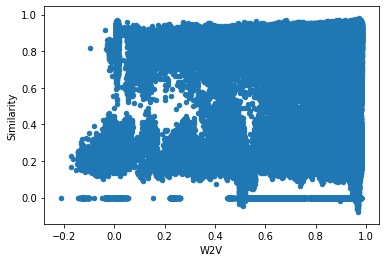

In [155]:
corr.plot.scatter(x = 'W2V', y = 'Similarity')

In [163]:
print(count)

24


In [168]:
corr1 = corr.values.tolist()


In [169]:
corr1[0]

[0.9172094111188741, 0.8667645084010281]

In [171]:
import csv
with open('W2V_Sim.csv', 'w') as f: 
      
    # using csv.writer method from CSV package 
    write = csv.writer(f) 
     
    write.writerow(["W2V","Similarity"])
    write.writerows(corr1)

In [203]:
import csv
with open('Column2.csv', 'w') as f: 
      
    # using csv.writer method from CSV package 
    write = csv.writer(f) 
     
    write.writerow(row)
    write.writerows(column)

In [202]:
row = list(range(0,8780))
#row[8770:]

In [177]:
len(column[0])

8780

In [257]:
import pandas as pd
test_dfCol = pd.read_csv("/Users/ryancramer/Desktop/Jupyter Notebook Files/Column.csv")
test_dfCol2 = pd.read_csv("/Users/ryancramer/Desktop/Jupyter Notebook Files/Column2.csv")
test_dfCol3 = pd.concat([test_dfCol,test_dfCol2])
test_dfCol3

,0,1,2,3,4,5,6,7,8,9,...,8770,8771,8772,8773,8774,8775,8776,8777,8778,8779
0,0.866765,0.820076,0.831417,0.735399,0.746892,0.826259,0.824602,0.863643,0.881462,0.827351,...,0.815167,0.851790,0.761471,0.180216,0.820568,0.348516,0.808758,0.178895,0.880250,0.802418
1,0.891944,0.840918,0.833264,0.726092,0.809313,0.803603,0.846248,0.878570,0.881742,0.860609,...,0.786309,0.904033,0.843263,0.216125,0.842062,0.331369,0.804828,0.214330,0.908770,0.855686
2,0.866756,0.843843,0.871807,0.780722,0.818170,0.883924,0.864499,0.868410,0.915478,0.815102,...,0.867475,0.856220,0.757057,0.225937,0.823581,0.312833,0.880187,0.231751,0.861052,0.758024
3,0.800267,0.844040,0.849693,0.739201,0.749170,0.872241,0.818690,0.818136,0.827945,0.781618,...,0.824751,0.857020,0.800465,0.193315,0.783639,0.306849,0.832592,0.193253,0.844189,0.784805
4,0.905055,0.849839,0.824750,0.726188,0.806523,0.821110,0.855340,0.893772,0.896083,0.852852,...,0.811606,0.902216,0.828375,0.199692,0.854019,0.320477,0.818777,0.197118,0.908849,0.844831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.873123,0.872752,0.857324,0.736863,0.811766,0.879597,0.885272,0.854047,0.877342,0.824478,...,0.851905,0.864668,0.784968,0.207998,0.806227,0.296403,0.836505,0.207928,0.876472,0.773961
726,0.848235,0.779953,0.845547,0.722801,0.739166,0.842055,0.799324,0.897262,0.849266,0.811988,...,0.811855,0.825798,0.723854,0.212638,0.801266,0.233645,0.817490,0.209999,0.882624,0.744730
727,0.866661,0.820932,0.845338,0.713119,0.767285,0.852613,0.836439,0.890508,0.836720,0.822145,...,0.819054,0.862068,0.795185,0.232862,0.825084,0.275121,0.831021,0.227897,0.880502,0.773536
728,0.856244,0.878658,0.841753,0.737971,0.812051,0.859405,0.879585,0.847718,0.910539,0.804668,...,0.842665,0.878221,0.794520,0.202251,0.808036,0.360894,0.845441,0.204266,0.847183,0.784783


In [183]:
len(column)

146

In [234]:
backtest = ["This is a test for the similarity method","How similar are these sentences","Java is the best programming language"]

In [ ]:
backtest2 = "How similar are these sentences"

In [235]:
docT = nlp.pipe(backtest)

In [236]:
for sent in docT:
    print(sent.text)
    for word in docT:
        print(word.text)
        print(sent.similarity(word))

This is a test for the similarity method
How similar are these sentences
0.6870982430436656
Java is the best programming language
0.7439008785457435


In [237]:
docT4 = nlp.pipe(backtest)

In [415]:
len(sumss)

3

In [238]:
sumss = []
for job in docT4:
    count = 0
    hold1 = np.empty(300)
    for word in job:
        hold1 = hold1 + nlp(str(word.lemma_)).vector
        count = count +1
    if count != 0:
        hold1 = hold1 / count
    sumss.append(hold1)

In [247]:
print(sumss)

[array([-2.43351241e-02,  2.10112751e-01, -1.45312751e-01,  5.31619128e-02,
       -8.97119978e-02, -1.33479278e-01,  2.65461000e+00,  2.00487324e-02,
       -3.45460595e-01,  1.93969773e+00, -1.75614389e-01,  2.88703460e+00,
        1.99272339e-01, -4.21463313e-04, -5.19964788e+01, -6.66355602e+00,
       -4.51710287e-02,  2.00703080e+00, -1.93702711e-01, -5.89504483e-01,
        5.67019358e+01, -1.54308482e-01,  4.21290285e+02,  1.38979218e-01,
       -2.55240925e-02,  1.50288580e-01, -4.17629341e-02, -3.09065999e-02,
       -1.09228813e-01, -3.98745433e-03,  4.19344764e-02, -5.83647619e-02,
        3.61763346e-01, -8.11203624e-03,  8.42592302e+01, -5.83830712e-02,
        1.70866353e+01, -1.27690706e+02,  1.41177657e-01, -1.84043687e-01,
        5.91747515e-02, -3.78897450e+00, -1.17296336e-01, -2.67943373e-02,
       -1.06771405e+01,  3.65511782e-03, -6.44065458e-02,  9.41178533e-02,
       -7.09260109e-02,  8.46121098e-02, -8.53951314e-02,  9.99351484e-02,
       -7.63692026e-02, 

In [243]:
sums2 = []
for word in sumss:
    sums2.append(word)
    
    

In [244]:
simT = 1-pairwise_distances(sums2,sums2, metric='cosine')

In [245]:
df_simTT = pd.DataFrame(simT)
df_simTT

,0,1,2
0,1.000000,0.999999,0.999997
1,0.999999,1.000000,0.999999
2,0.999997,0.999999,1.000000


In [ ]:
#wronggg,wronggg,wronggg,wronggg,wrongg

In [455]:
#Fast text
average = 0
histoFW = []
histoFC = []
for word in test_df3.values:
    #print(word)
    one = df_simFCF[word[1]][word[0]]
    two = df_simFCF[word[2]][word[0]]
    
    if one==two:
        print("broken")
    
    
    #avg_sim = (one+two)/2
    
    #mean = df_simFCF.mean(axis=1)[word[0]]
    #could use median
    
    if word[3] == 1 and abs(one) > abs(two):
        average = average + 1 
        histoFC.append(abs(one-two))
    elif word[3] == 2 and abs(two) > abs(one):
        average = average + 1
        histoFC.append(abs(one-two))
    elif word[3] == 1 or word[3] == 2:
        histoFW.append(abs(one-two))
    #elif word[3] == 0 and avg_sim < mean:
        #average = average + 1
    #elif word[3] == 3 and avg_sim > mean:
        #average = average + 1   
average = average/numTest
print(average)

0.57


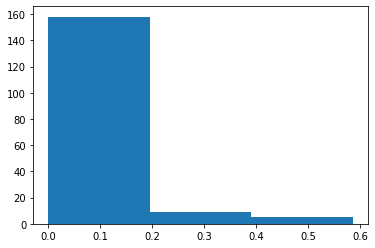

In [456]:
import matplotlib.pyplot as plt

wrong = plt.hist(histoFW,3)

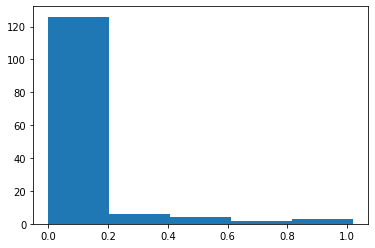

In [380]:
correct = plt.hist(histoFC,5)

In [457]:
import statistics
#average difference in similarity
print("all")
print(statistics.mean(histoFC+histoFW))
print("correct")
print(statistics.mean(histoFC))
print("wrong")
print(statistics.mean(histoFW))

all
0.08867021562068063
correct
0.10854965352977096
wrong
0.0623184025783981


In [357]:
len(columnFinal[0])

8780

In [352]:
df_simFCW

,0,1,2,3,4,5,6,7,8,9,...,8771,8772,8773,8774,8775,8776,8777,8778,8779,8780
0,0.875555,0.917209,0.920380,0.898639,0.891890,0.845145,0.839304,0.837189,0.855519,0.865233,...,0.887505,0.871609,0.866951,0.648805,0.682010,0.682459,0.752374,0.609586,0.647562,0.718489
1,0.906836,0.958641,0.964180,0.946599,0.937960,0.903088,0.893220,0.892781,0.909218,0.916893,...,0.914126,0.907124,0.913458,0.733939,0.765703,0.766128,0.828137,0.696135,0.732812,0.796522
2,0.890318,0.947668,0.955978,0.951709,0.945981,0.924629,0.916891,0.915547,0.929854,0.937482,...,0.933985,0.920708,0.918493,0.729721,0.762713,0.763168,0.835291,0.699475,0.734789,0.793976
3,0.889928,0.947064,0.955760,0.951842,0.946323,0.925047,0.917396,0.916094,0.930237,0.937945,...,0.935420,0.921934,0.919983,0.730511,0.763454,0.763895,0.836084,0.700074,0.735254,0.794650
4,0.898438,0.955463,0.963163,0.954597,0.948171,0.922755,0.913985,0.913143,0.928031,0.935762,...,0.932307,0.922570,0.923081,0.734590,0.767320,0.767733,0.837444,0.702042,0.737935,0.798391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,0.886474,0.943406,0.954766,0.953086,0.947823,0.939659,0.932798,0.933134,0.946321,0.954407,...,0.941186,0.936847,0.935870,0.742465,0.774187,0.774553,0.847799,0.710198,0.743236,0.797499
872,0.886518,0.943438,0.954791,0.953110,0.947844,0.939655,0.932801,0.933131,0.946322,0.954406,...,0.941182,0.936842,0.935863,0.742441,0.774164,0.774530,0.847783,0.710175,0.743219,0.797483
873,0.886545,0.943458,0.954808,0.953127,0.947858,0.939658,0.932809,0.933138,0.946329,0.954412,...,0.941181,0.936849,0.935875,0.742436,0.774159,0.774525,0.847781,0.710166,0.743212,0.797478
874,0.886522,0.943443,0.954799,0.953125,0.947859,0.939664,0.932811,0.933141,0.946330,0.954414,...,0.941189,0.936858,0.935881,0.742426,0.774151,0.774516,0.847776,0.710155,0.743199,0.797469


In [458]:
#Word 2 Vec
average = 0
histoWW = []
histoWC = []
for word in test_df3.values:
    #print(word)
    one = df_simFCW[word[1]][word[0]]
    two = df_simFCW[word[2]][word[0]]
    
    if one==two:
        print("broken")
    
    #avg_sim = (one+two)/2
    
    #mean = df_simFCF.mean(axis=1)[word[0]]
    #could use median
    
    if word[3] == 1 and one > two:
        average = average + 1 
        histoWC.append(abs(one-two))
    elif word[3] == 2 and two > one:
        average = average + 1
        histoWC.append(abs(one-two))
    elif word[3] == 1 or word[3] == 2:
        histoWW.append(abs(one-two))
    #elif word[3] == 0 and avg_sim < mean:
        #average = average + 1
    #elif word[3] == 3 and avg_sim > mean:
        #average = average + 1   
average = average/numTest
print(average)

0.5475


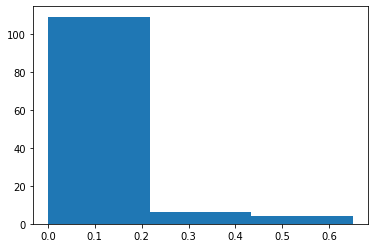

In [371]:
wrong = plt.hist(histoWW,3)

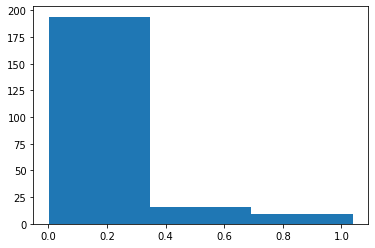

In [459]:
correct = plt.hist(histoWC,3)

In [460]:
import statistics
#average difference in similarity
print("all")
print(statistics.mean(histoWC+histoWW))
print("correct")
print(statistics.mean(histoWC))
print("wrong")
print(statistics.mean(histoWW))

all
0.09786408325530786
correct
0.12166293713252802
wrong
0.06906878491767686


In [451]:
#Similarity Spacy
average = 0

histoSW = []
histoSC = []
for word in test_df3.values:
    #print(word)
    #swithced
    #if word[0]<len(col):
    #count = count + 1
    one = columnFinal[word[0]][word[1]-1]
    two = columnFinal[word[0]][word[2]-1]
        #avg_sim = (one+two)/2
        #mean = col.mean(axis=1)[word[0]]
    if one==two:
        print("broken")
        
    if word[3] == 1 and one > two:
        average = average + 1 
        histoSC.append(abs(one-two))
    elif word[3] == 2 and two > one:
        average = average + 1
        histoSC.append(abs(one-two)) 
    elif word[3] == 1 or word[3] == 2:
        histoSW.append(abs(one-two))

    '''
    elif word[3] == 0 and avg_sim < mean:
        average = average + 1
    elif word[3] == 3 and avg_sim > mean:
        average = average + 1
    '''
            
        
average = average/numTest
#print("Count: ")
#print(count)
print("Average: ")
print(average)

Average: 
0.755


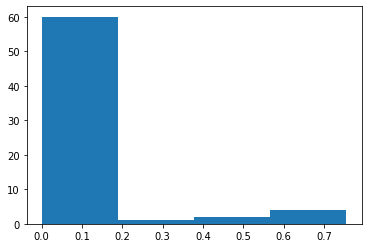

In [375]:
wrong = plt.hist(histoSW,4)

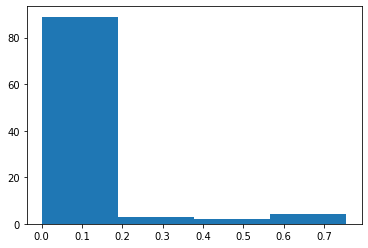

In [453]:
wrong = plt.hist(histoSW,4)

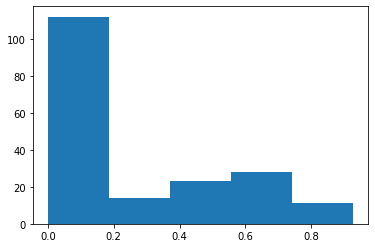

In [376]:
correct = plt.hist(histoSC,5)

In [316]:
len(histoSC)

65

In [317]:
len(histoSW)

65

In [318]:
65*2

130

In [454]:
import statistics
#average difference in similarity
print("all")
print(statistics.mean(histoSC+histoSW))
print("correct")
print(statistics.mean(histoSC))
print("wrong")
print(statistics.mean(histoSW))


all
0.23591364229810013
correct
0.28267029286287293
wrong
0.09182682116992276


In [324]:
import statistics
statistics.mean([1,2])

1.5

In [325]:
jjj = [1] + [2]
print(jjj)

[1, 2]


In [ ]:
#Euclidean

In [472]:
len(test_df3.values)

578

In [473]:
#FastText Euclidean distance
average = 0
count = 0
histoFW = []
histoFC = []
for word in test_df3.values:
    one = df_simFEF[word[1]][word[0]]
    two = df_simFEF[word[2]][word[0]]
    if (one + two) < 99999999999:   
        if word[3] == 1 and one < two:
            average = average + 1 
            histoFC.append(abs(abs(one)-abs(two)))
            count = count + 1
        elif word[3] == 2 and two < one:
            average = average + 1
            histoFC.append(abs(abs(one)-abs(two))) 
            count = count + 1
        elif word[3] == 1 or word[3] == 2:
            histoFW.append(abs(abs(one)-abs(two)))
            count = count + 1
        
average = average/count
print(average)
print(count)

0.46984924623115576
398


In [470]:
len(histoFW)

211

In [474]:
import statistics
#average difference in similarity
print("all")
print(statistics.mean(histoFC+histoFW))
print("correct")
print(statistics.mean(histoFC))
print("wrong")
print(statistics.mean(histoFW))

all
7329.8091742077195
correct
14496.831144187981
wrong
977.9934946517512


In [461]:
#Word 2 Vec Euclidean distance
average = 0
count = 0
histoWW = []
histoWC = []
for word in test_df3.values:
    one = df_simFEW[word[1]][word[0]]
    two = df_simFEW[word[2]][word[0]]
    
    
    
    
    if word[3] == 1 and one < two:
        average = average + 1 
        histoWC.append(abs(abs(one)-abs(two)))
    elif word[3] == 2 and two < one:
        average = average + 1
        histoWC.append(abs(abs(one)-abs(two))) 
    elif word[3] == 1 or word[3] == 2:
        histoWW.append(abs(abs(one)-abs(two)))
        
average = average/numTest
print(average)

0.47


In [462]:
import statistics
#average difference in similarity
print("all")
print(statistics.mean(histoWC+histoWW))
print("correct")
print(statistics.mean(histoWC))
print("wrong")
print(statistics.mean(histoWW))

all
1754.122713221096
correct
3123.6942246439526
wrong
539.5970332800727
